In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:09<00:00, 234MB/s]
100% 1.06G/1.06G [00:09<00:00, 118MB/s]


In [ ]:
import zipfile
zip = zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
zip.extractall('/content')
zip.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
import matplotlib.pyplot as plt


In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [ ]:
test_ds = keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


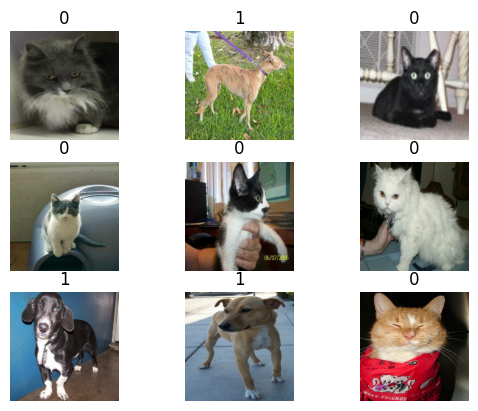

In [ ]:
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy()/255.0)
        plt.title(str(labels[i].numpy()))
        plt.axis("off")

In [ ]:
def process(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 75s 104ms/step - loss: 2.9131 - accuracy: 0.5292 - val_loss: 0.6863 - val_accuracy: 0.5854
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6871 - accuracy: 0.5471 - val_loss: 0.6398 - val_accuracy: 0.6402
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.6894 - accuracy: 0.5710 - val_loss: 0.6573 - val_accuracy: 0.6296
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6579 - accuracy: 0.6010 - val_loss: 0.6105 - val_accuracy: 0.7100
Epoch 5/10
625/625 [==============================] - 68s 107ms/step - loss: 0.6387 - accuracy: 0.6192 - val_loss: 0.6401 - val_accuracy: 0.6342
Epoch 6/10
625/625 [==============================] - 64s 101ms/step - loss: 0.6855 - accuracy: 0.6058 - val_loss: 0.6030 - val_accuracy: 0.7134
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6339 - accuracy: 0.6247 - val_loss: 0.5580 - val_ac

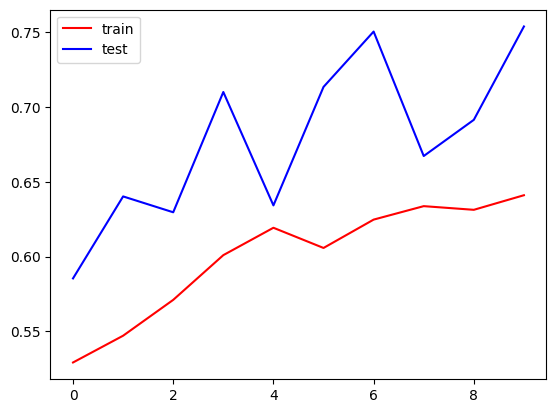

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

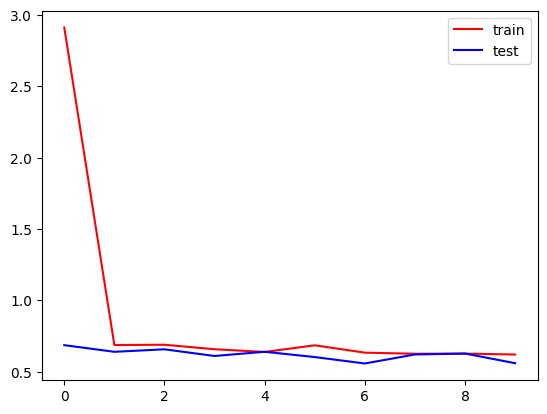

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()


In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/Dog.webp')
plt.imshow(test_img)

In [ ]:
test_img.shape

(1059, 800, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test= test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test)

1/1 [==============================] - 0s 391ms/step


array([[0.]], dtype=float32)